# Clustering
K-means and Agglomerative

### Theories


K-means is a fairly simple clustering algorithm and is very popular in unsupervised algorithms for data scientists. Meanwhile, Hyper-spheres are mathematical objects that exist above a sphere in 4-dimensional space. Why is K-means not suitable for non-hyper-spheres?

> K-means is difficult to provide good performance in non-spherical dimensions, this is because this algorithm works where when there are two data in the same dataset that have different Euclidean distances between each other, K-means will put the two data in different clusters after partitioning. K-means is suitable for spherical sets where after partitioning, all data in the cluster remains distanced from the center of each component.

When using algorithms, sometimes we have large parameters and poorly defined clusters, making it difficult to use algorithms that require a large number of clusters. However, Hierarchical clustering can be used without the need to specify the number of clusters, because in Hierarchical clustering, we use Connectivity; works on the idea that data that is close is more connected than data that is further away.

In Hierarchical clustering, the algorithm will store memory about how clusters are formed or divided, and from this information, a Dendogram will be created; used to set limits in determining the number of clusters that must be made.

### Guess the clustering





In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import metrics

In [ ]:
# Read data
df2 = pd.read_csv('https://raw.githubusercontent.com/iqrafarhan/KASDD/main/soal2.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/iqrafarhan/KASDD/main/soal3.csv')
df4 = pd.read_csv('https://raw.githubusercontent.com/iqrafarhan/KASDD/main/soal4.csv')

In [ ]:
# View the variables used
df2.head()

,x1,x2
0,9.063209,-2.528833
1,-3.896203,1.464862
2,-1.979298,-7.873692
3,-5.437357,2.759334
4,2.052434,-9.600788


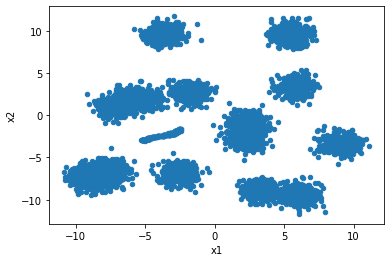

In [ ]:
# Displays data on a 2-dimensional plot
df2.plot(x ='x1', y='x2', kind = 'scatter')
plt.show()

From the plot results above, it can be seen that clusterings have been formed whose numbers can be counted because the appearance is very clear, namely 11 clusters.

From the clustering that I have obtained, I will use the K-means algorithm. I chose this algorithm because this clustering is suitable for data that already has clustering specifications, and has a hyper-spherical cluster shape.

#### Visualizing the clustering results

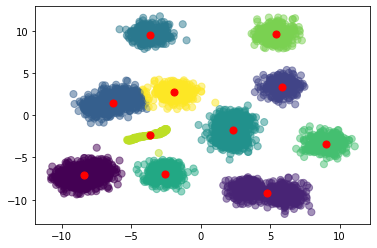

In [ ]:
kmeans = KMeans(n_clusters=11).fit(df2)
centroids = kmeans.cluster_centers_

plt.scatter(df2['x1'], df2['x2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

Visualizing it with different colors will make it easier for me to identify the clusters.

#### Calculating the intra-class similarity value of the clustering results

 I will do this by calculating the sum of distances (sum of distance) of each sample to the cluster center. The coordinates of a cluster center are the average of all samples in that cluster. The distance formula used is L2-norm/Euclidean Distance.

In [ ]:
kmeans.fit(df2)
kmeans.inertia_

8054.129644060764

#### Calculating the silhouette coefficient value from the clustering results.

In [ ]:
label = kmeans.labels_
metrics.silhouette_score(df2, label, metric = 'euclidean')

0.7181806865976839

### Hierarchical Clustering



I'm going to use hierarchical clustering on this dataset.

In [ ]:
df3.head()

,x,y
0,-25.0,-50.0
1,-24.5,-59.9
2,-24.0,-69.6
3,-23.5,-79.1
4,-23.0,-88.4


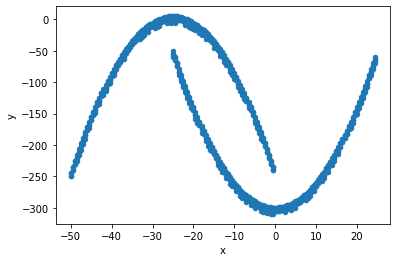

In [ ]:
# Displays data on a 2-dimensional plot
df3.plot(x ='x', y='y', kind = 'scatter')
plt.show()

Jumlah cluster yang ada:  2


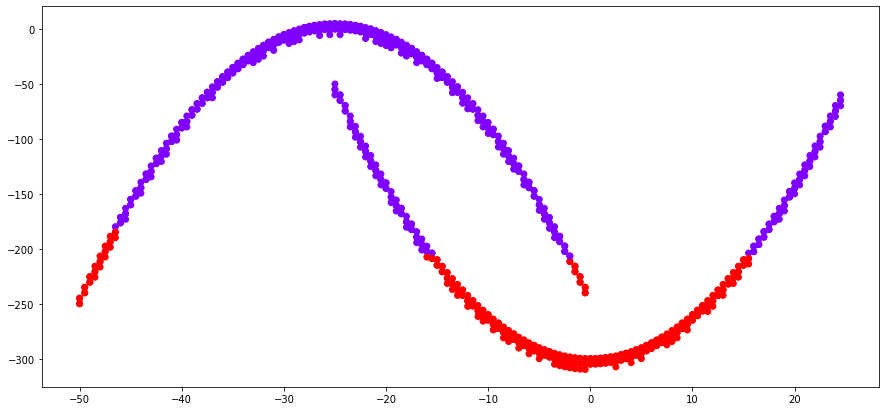

In [ ]:
cluster = AgglomerativeClustering(n_clusters = None, compute_full_tree=True, distance_threshold=3200)
cluster.fit_predict(df3)
total_Cluster = cluster.n_clusters_

print("Number of clusters: ", total_Cluster)
plt.figure(figsize=(15, 7))
plt.scatter(df3['x'], df3['y'], c=cluster.labels_, cmap='rainbow')
plt.show()

Due to the use of hierarchical data that does not yet have a specification for the number of clusterings, it can be understood that the clustering display for non-spherical data above does not match what was requested. The following is the use of hierarchical clustering on the data above where the number of clustering is 2.

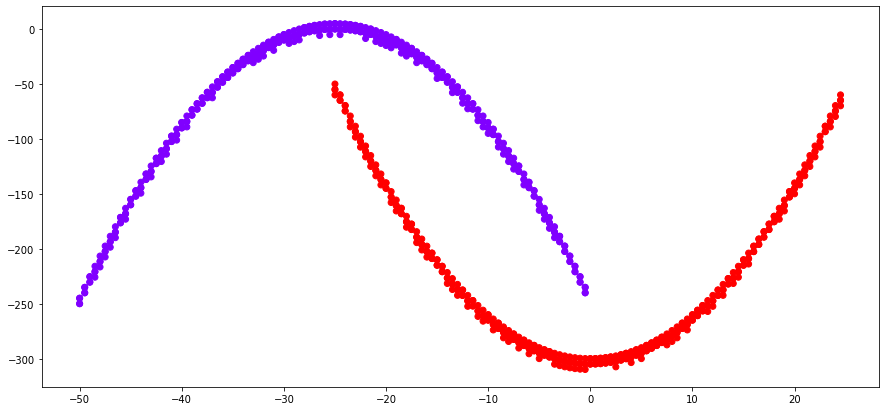

In [ ]:
cluster = AgglomerativeClustering(n_clusters = 2, linkage="single")

plt.figure(figsize =(15, 7))
plt.scatter(df3['x'], df3['y'], c = cluster.fit_predict(df3), cmap ='rainbow')
plt.show()

The use of hierarchical clustering is carried out because of the lack of clarity of the clusters formed. Cluster determination can be done by changing parameters:

* n_clusters=None: Fill in None so that distance_threshold can determine the clustering. Fill in 2 so that the display matches what is requested.
* compute_full_tree=True: True due to the use of distance_threshold which is not None
* distance_threshold=3200: This distance threshold is a parameter to state the clustering distance limit. I chose 3200 because the separation is close enough.
* linkage: declared single to display the most suitable distance.

#### Clustering using K-Means on the data, visualizing the results, then analyzing the results.

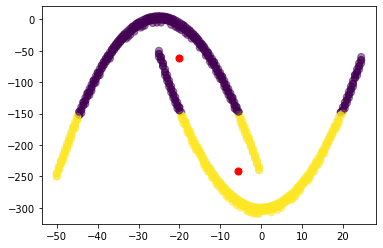

In [ ]:
kmeans = KMeans(n_clusters=2).fit(df3)
centroids = kmeans.cluster_centers_

plt.scatter(df3['x'], df3['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

The results of my analysis from the plot above are that the use of clustering with K-Means is not suitable for non-spherical data types. The image above is of course not classified as spherical data, where with clustering the image should be formed in the example given, here it can be seen that the center point of the data does not fully represent the members of the dataset.

### Which came first: dimensionality reduction or clustering?





##### Case A

In [ ]:
df4copy = df4.copy()

Here I will try to perform Dimensionality reduction (PCA) on data_copy_1 so that the number of features becomes 2

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_library = pca.fit_transform(df4copy)
print("Eigen Value : ")
print(pca.explained_variance_ratio_)

pca_df4copy = pd.DataFrame(data = pca_library , columns = ["Principal Components 1", "Principal Components 2"])
pca_df4copy.head()

Eigen Value : 
[0.82326936 0.11539094]


,Principal Components 1,Principal Components 2
0,-9.179975,-0.375006
1,-9.695655,-0.628829
2,-9.185552,-0.938522
3,-9.907051,0.741142
4,-8.768029,-0.057197


The value of eigenvalues indicate the stability of the PCA solution, here the egienvalues are large which hopefully correspond to stable directions in data.

Now I'm going to visualize the reduced data_copy_1, then determine the correct number of clusters!

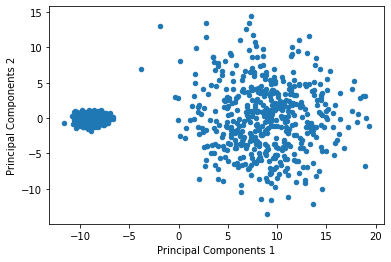

In [ ]:
pca_df4copy.plot(x ="Principal Components 1", y="Principal Components 2", kind = 'scatter')
plt.show()

From the image above, I can assume that there are 2 clusters that can be identified.

Here I will perform clustering on data_copy_1 which has been reduced using K-Means with parameter random_state=2021

In [ ]:
kmeans = KMeans(n_clusters=2, random_state = 2021).fit(pca_df4copy)
centroids = kmeans.cluster_centers_

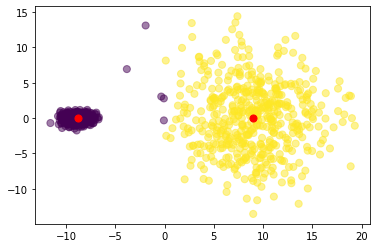

In [ ]:
plt.scatter(pca_df4copy['Principal Components 1'], pca_df4copy['Principal Components 2'], c = kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

#### Case B



In [ ]:
df4copy2 = df4.copy()

I will perform clustering on data_copy_2 using K-Means with parameter random_state=2021 and the number of clusters is the same as the number of clusters I used in case A!

In [ ]:
kmeans = KMeans(n_clusters=2, random_state = 2021).fit(df4copy2)
centroids = kmeans.cluster_centers_

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_library = pca.fit_transform(df4copy2)
print("Eigen Value : ")
print(pca.explained_variance_ratio_)

pca_df4copy2 = pd.DataFrame(data = pca_library , columns = ["Principal Components 1", "Principal Components 2"])
pca_df4copy2.head()

Eigen Value : 
[0.82326936 0.11539094]


,Principal Components 1,Principal Components 2
0,-9.179975,-0.375006
1,-9.695655,-0.628829
2,-9.185552,-0.938522
3,-9.907051,0.741142
4,-8.768029,-0.057197


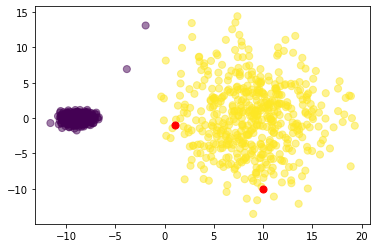

In [ ]:
plt.scatter(pca_df4copy2['Principal Components 1'], pca_df4copy2['Principal Components 2'], c = kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

#### Case A vs Case B

From the execution order between case A and B, there's a slight difference of the result when I did the reduction. In case A, reduction using PCA is carries out before clustering. Meanwhile, in case B, reduction is carried out after the clustering. Both cases shows a slight difference in terms of results, and that the reduction carried out before clustering visualizes the clustering better. This is because performing PCA Reduction before clustering validate the clustering algorithm used, by showing clusters that were previously invisible.